In [35]:
import pandas as pd
from database_utils import DatabaseConnector as dc

import numpy as np
import nbformat
import plotly.express as px
import missingno as msno
import re
from dateutil.parser import parse # to help with datatime edits

database_connector = dc()
credentials = database_connector.read_db_creds('db_creds.yaml')
engine, _ = database_connector.init_db_engine(credentials)

# Import data from 'legacy_users' table into DataFrame
legacy_users_df = pd.read_sql('legacy_users', engine)

# Display the DataFrame
legacy_users_df

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
0,0,Sigfried,Noack,1990-09-30,Heydrich Junitz KG,rudi79@winkler.de,Zimmerstr. 1/0\n59015 Gießen,Germany,DE,+49(0) 047905356,2018-10-10,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8
1,1,Guy,Allen,1940-12-01,Fox Ltd,rhodesclifford@henderson.com,Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH,United Kingdom,GB,(0161) 496 0674,2001-12-20,8fe96c3a-d62d-4eb5-b313-cf12d9126a49
2,2,Harry,Lawrence,1995-08-02,"Johnson, Jones and Harris",glen98@bryant-marshall.co.uk,92 Ann drive\nJoanborough\nSK0 6LR,United Kingdom,GB,+44(0)121 4960340,2016-12-16,fc461df4-b919-48b2-909e-55c95a03fe6b
3,3,Darren,Hussain,1972-09-23,Wheeler LLC,daniellebryan@thompson.org,19 Robinson meadow\nNew Tracy\nW22 2QG,United Kingdom,GB,(0306) 999 0871,2004-02-23,6104719f-ef14-4b09-bf04-fb0c4620acb0
4,4,Garry,Stone,1952-12-20,Warner Inc,billy14@long-warren.com,3 White pass\nHunterborough\nNN96 4UE,United Kingdom,GB,0121 496 0225,2006-09-01,9523a6d3-b2dd-4670-a51a-36aebc89f579
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,14913,Stephen,Jenkins,1943-08-09,"Thornton, Carroll and Newman",s.jenkins@smith.com,Studio 41I\nJones lodge\nOliviaborough\nE8 3DU,United Kingdom,GB,+44(0)292018946,2016-04-15,2bd3a12f-a92d-4cdd-b99c-fc70572db302
15316,14994,Stephen,Smith,1948-08-20,Robinson-Harris,s.smith@smith.com,530 Young parkway\nMillsfurt\nL4G 7NX,United Kingdom,GB,+44(0)1144960977,2020-07-20,d234c04b-c07c-46a5-a902-526f91478ecc
15317,15012,Stephen,Losekann,1940-10-09,Rosenow,s.losekann@smith.com,Viviane-Fritsch-Straße 3/5\n15064 Bad Liebenwerda,Germany,DE,02984 08192,2021-03-07,1a0a8b7b-7c17-42d8-a946-8a85d5495651
15318,15269,Stephen,Rivera,1952-06-04,"Taylor, Fry and Jones",s.rivera@smith.com,"660 Ross Falls Suite 357\nAnthonymouth, MA 09610",United States,US,239.711.3836,2011-01-03,187fe06e-bd5f-4381-af2f-d7ac37ca7572


In [36]:
# Make a copy of the DataFrame
legacy_users_df_original = legacy_users_df.copy()

print("Display the DataFrame details:\n")
print(legacy_users_df.info(), "\n")
display(legacy_users_df.describe(include='all'))

Display the DataFrame details:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          15320 non-null  int64 
 1   first_name     15320 non-null  object
 2   last_name      15320 non-null  object
 3   date_of_birth  15320 non-null  object
 4   company        15320 non-null  object
 5   email_address  15320 non-null  object
 6   address        15320 non-null  object
 7   country        15320 non-null  object
 8   country_code   15320 non-null  object
 9   phone_number   15320 non-null  object
 10  join_date      15320 non-null  object
 11  user_uuid      15320 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB
None 



,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
count,15320.000000,15320,15320,15320,15320,15320,15320,15320,15320,15320,15320,15320
unique,NaN,2178,1192,11360,12105,15300,15300,19,20,15092,8268,15300
top,NaN,Michael,Smith,NULL,Smith Inc,NULL,NULL,United Kingdom,GB,NULL,NULL,NULL
freq,NaN,57,340,21,22,21,21,9371,9365,21,21,21
mean,7659.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4422.647397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3829.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7659.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,11489.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
legacy_users_df.describe()

,index
count,15320.000000
mean,7659.500000
std,4422.647397
min,0.000000
25%,3829.750000
50%,7659.500000
75%,11489.250000
max,15319.000000


In [38]:
print("Check how many missing values each column has:\n")
legacy_users_df_null = legacy_users_df.isnull()  # .isna() is the same as .isnull()
print("Number of missing values in each column:\n")
display(legacy_users_df_null.sum())

Check how many missing values each column has:

Number of missing values in each column:



index            0
first_name       0
last_name        0
date_of_birth    0
company          0
email_address    0
address          0
country          0
country_code     0
phone_number     0
join_date        0
user_uuid        0
dtype: int64

<Axes: >

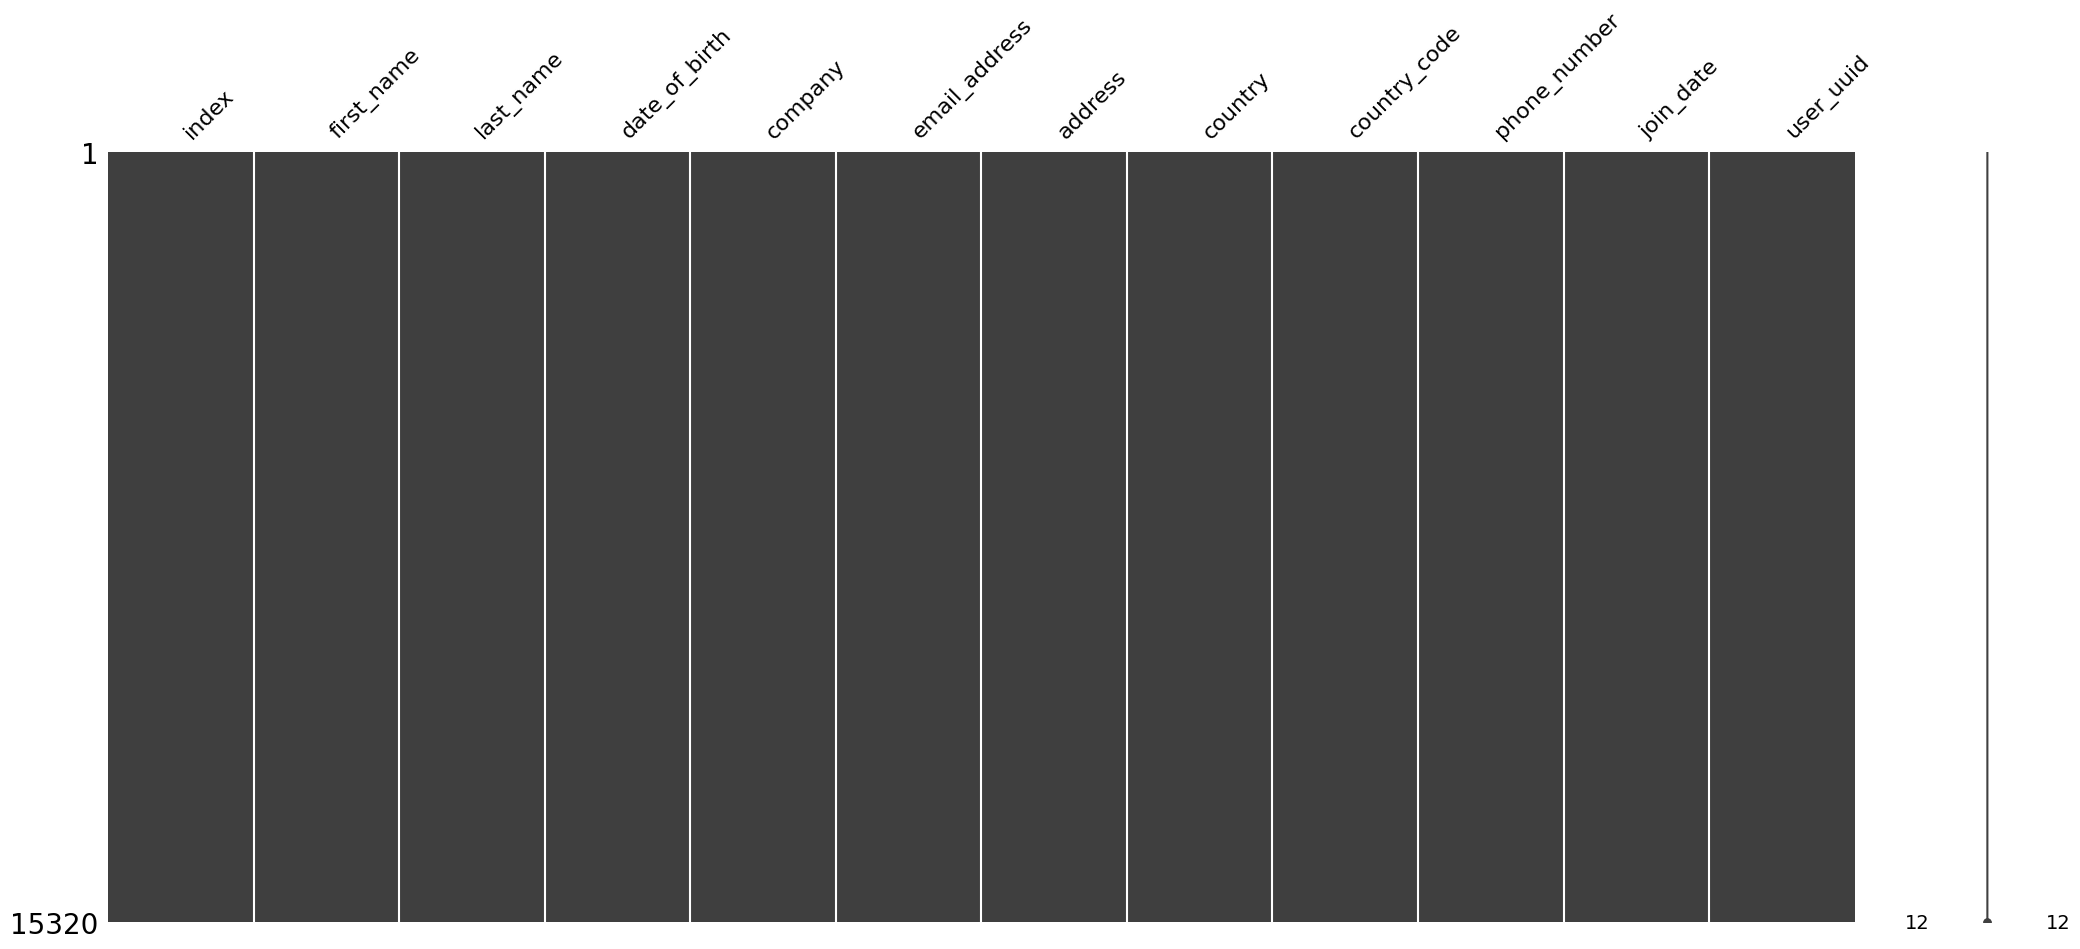

In [39]:
# Visualising Missing Data
import missingno as msno

msno.matrix(legacy_users_df)

In [40]:
print("list of unique values for 'index'")
print((legacy_users_df["index"].unique()))

list of unique values for 'index'
[    0     1     2 ... 15012 15269  1249]


In [41]:
print("count on unique values found in 'index'")

legacy_users_df["index"].nunique()

count on unique values found in 'index'


15320

# Check first_name, last_name, country

In [42]:
print("list of unique values for 'first_name'")
list_of_unique_names = np.sort(legacy_users_df["first_name"].unique())
display(list_of_unique_names)

list of unique values for 'first_name'


array(['2GU3G97VI1', '31XQ1Z35J9', 'Aaron', ..., 'Zoltan', 'Zoran',
       'Änne'], dtype=object)

In [43]:
len(legacy_users_df["first_name"])

15320

In [44]:
print("count on unique values found in 'first_name'")

legacy_users_df["first_name"].nunique()

count on unique values found in 'first_name'


2178

In [45]:
# filtering mask created
condition_to_exclude = (
    legacy_users_df['first_name'].astype(str).str.contains('\d|ULNL') |
    legacy_users_df['last_name'].astype(str).str.contains('\d|NULL') |
    legacy_users_df['country'].astype(str).str.contains('\d|NULL')
)

print("Mask created to check for numbers and 'NULL' for columns (first_name, last_name, country): ")
display(legacy_users_df[condition_to_exclude])


Mask created to check for numbers and 'NULL' for columns (first_name, last_name, country): 


,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
752,752,PYCLKLLC7I,W350SCUD6R,KBTI7FI7Y3,R7IZUNSQX0,3Q791B3VIY,YW2YXLOQ5J,I7G4DMDZOZ,VSM4IZ4EL3,A4Q4HQBI3I,JJ2PDVNPRO,W43MSCMQ88
866,867,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1022,1023,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1046,1047,GI4C78KWH0,UTB5PPYFG8,OFH8YGZJWN,CA1XGS8GZW,7HSZB429UK,63GXGYR3XL,AJ1ENKS3QL,QVUW9JSKY3,64ZO0ONUQO,AHN6EKASH3,BUE34OU973
1805,1807,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
2103,2103,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
2437,2439,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
2739,6526,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
2764,2764,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
2995,2997,DPAJNJL6PR,B8ZGN8ZJ84,PQPEUO937L,0YJ2FRMDB4,O5Q6D7FDAF,Y1GY1G3EM5,XGI7FM0VBJ,0CU6LW3NKB,DU9UJ42F3E,FYF2FAPZF3,56URKLG01W


In [46]:
# Apply the filter and convert the specified columns to string datatype
legacy_users_df_filtered = legacy_users_df[~condition_to_exclude].astype({'first_name': 'string', 'last_name': 'string', 'country': 'string'})

legacy_users_df_filtered['country'] = legacy_users_df_filtered['country'].astype('category')
unique_countries = legacy_users_df_filtered['country'].unique()
print(unique_countries, "\n")

# Display the filtered DataFrame
print("Filtered and converted DataFrame:\n")
display(legacy_users_df_filtered.info())
display(legacy_users_df_filtered)


['Germany', 'United Kingdom', 'United States']
Categories (3, string): [Germany, United Kingdom, United States] 

Filtered and converted DataFrame:

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          15284 non-null  int64   
 1   first_name     15284 non-null  string  
 2   last_name      15284 non-null  string  
 3   date_of_birth  15284 non-null  object  
 4   company        15284 non-null  object  
 5   email_address  15284 non-null  object  
 6   address        15284 non-null  object  
 7   country        15284 non-null  category
 8   country_code   15284 non-null  object  
 9   phone_number   15284 non-null  object  
 10  join_date      15284 non-null  object  
 11  user_uuid      15284 non-null  object  
dtypes: category(1), int64(1), object(8), string(2)
memory usage: 1.4+ MB


None

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
0,0,Sigfried,Noack,1990-09-30,Heydrich Junitz KG,rudi79@winkler.de,Zimmerstr. 1/0\n59015 Gießen,Germany,DE,+49(0) 047905356,2018-10-10,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8
1,1,Guy,Allen,1940-12-01,Fox Ltd,rhodesclifford@henderson.com,Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH,United Kingdom,GB,(0161) 496 0674,2001-12-20,8fe96c3a-d62d-4eb5-b313-cf12d9126a49
2,2,Harry,Lawrence,1995-08-02,"Johnson, Jones and Harris",glen98@bryant-marshall.co.uk,92 Ann drive\nJoanborough\nSK0 6LR,United Kingdom,GB,+44(0)121 4960340,2016-12-16,fc461df4-b919-48b2-909e-55c95a03fe6b
3,3,Darren,Hussain,1972-09-23,Wheeler LLC,daniellebryan@thompson.org,19 Robinson meadow\nNew Tracy\nW22 2QG,United Kingdom,GB,(0306) 999 0871,2004-02-23,6104719f-ef14-4b09-bf04-fb0c4620acb0
4,4,Garry,Stone,1952-12-20,Warner Inc,billy14@long-warren.com,3 White pass\nHunterborough\nNN96 4UE,United Kingdom,GB,0121 496 0225,2006-09-01,9523a6d3-b2dd-4670-a51a-36aebc89f579
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,14913,Stephen,Jenkins,1943-08-09,"Thornton, Carroll and Newman",s.jenkins@smith.com,Studio 41I\nJones lodge\nOliviaborough\nE8 3DU,United Kingdom,GB,+44(0)292018946,2016-04-15,2bd3a12f-a92d-4cdd-b99c-fc70572db302
15316,14994,Stephen,Smith,1948-08-20,Robinson-Harris,s.smith@smith.com,530 Young parkway\nMillsfurt\nL4G 7NX,United Kingdom,GB,+44(0)1144960977,2020-07-20,d234c04b-c07c-46a5-a902-526f91478ecc
15317,15012,Stephen,Losekann,1940-10-09,Rosenow,s.losekann@smith.com,Viviane-Fritsch-Straße 3/5\n15064 Bad Liebenwerda,Germany,DE,02984 08192,2021-03-07,1a0a8b7b-7c17-42d8-a946-8a85d5495651
15318,15269,Stephen,Rivera,1952-06-04,"Taylor, Fry and Jones",s.rivera@smith.com,"660 Ross Falls Suite 357\nAnthonymouth, MA 09610",United States,US,239.711.3836,2011-01-03,187fe06e-bd5f-4381-af2f-d7ac37ca7572


# Check country_code

In [47]:
print("list of unique values for 'country_code'")
legacy_users_df_filtered_country_code = legacy_users_df_filtered["country_code"].unique()
display(legacy_users_df_filtered_country_code)

list of unique values for 'country_code'


array(['DE', 'GB', 'US', 'GGB'], dtype=object)

In [48]:
legacy_users_df_filtered_country_code = legacy_users_df_filtered[legacy_users_df_filtered["country_code"] == 'GGB']
legacy_users_df_filtered_country_code

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
2597,2597,Peter,Mitchell,1942-01-11,"Jennings, Taylor and Davies",mlambert@riley.com,849 Collins camp\nSouth Francisland\nAL80 8TD,United Kingdom,GGB,0121 4960043,1995-07-15,bd3e3bc5-3a25-40dd-ac0f-3f2aaf5814df
8439,8451,Hollie,Wilson,1967-11-28,Hughes Ltd,clane@foster.com,431 Eleanor drive\nLake Yvonne\nEC28 1HL,United Kingdom,GGB,(01632) 960949,2008-10-18,686f612a-0acb-4992-ab03-3913c2011b1e
9407,9420,Harriet,Berry,1943-12-29,Vincent LLC,paige87@knight.info,Studio 5\nJamie village\nSouth Howard\nBB0 2QQ,United Kingdom,GGB,+44(0)29 2018971,2000-12-25,0f2b4d28-dcb9-45fe-aff3-7b9135f8d89b
11655,11672,Allan,Ryan,1975-02-28,Herbert LLC,simonlambert@barnett.info,Studio 28\nGill drive\nLake Gregory\nRH9 5LP,United Kingdom,GGB,0121 4960266,1998-05-05,6c20ecd2-499e-4883-85ff-fd50a077cbf3
12338,12359,Cheryl,White,1987-02-17,Ward-Smith,tony04@smith.com,58 Colin mills\nNew Alex\nS2K 5BB,United Kingdom,GGB,0141 4960403,2010-02-23,347f4f09-7f10-4e5f-b116-05f14bb88944
12618,12640,Joseph,Wright,1951-06-10,Brooks Inc,christianlee@williams-white.com,63 O'Neill falls\nWest Dawn\nN9T 5QJ,United Kingdom,GGB,+441184960597,2008-10-19,c014fa5c-396e-433b-93c1-10ae4d69e897


In [49]:
# Replace 'GGB' with 'GB'
legacy_users_df_filtered['country_code'] = legacy_users_df_filtered['country_code'].replace({'GGB': 'GB'})
print(legacy_users_df_filtered['country_code'].unique())
print(legacy_users_df_filtered['country_code'].nunique())

legacy_users_df_filtered['country_code'] = legacy_users_df_filtered['country_code'].astype('category')


legacy_users_df_filtered.info()

['DE' 'GB' 'US']
3
<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          15284 non-null  int64   
 1   first_name     15284 non-null  string  
 2   last_name      15284 non-null  string  
 3   date_of_birth  15284 non-null  object  
 4   company        15284 non-null  object  
 5   email_address  15284 non-null  object  
 6   address        15284 non-null  object  
 7   country        15284 non-null  category
 8   country_code   15284 non-null  category
 9   phone_number   15284 non-null  object  
 10  join_date      15284 non-null  object  
 11  user_uuid      15284 non-null  object  
dtypes: category(2), int64(1), object(7), string(2)
memory usage: 1.3+ MB


In [50]:
# def column_value_set(column: str, df: pd.DataFrame):
#     temp_list = df[column].tolist()
#     print(set(temp_list))

# column_value_set('company', legacy_users_df_filtered)

In [51]:
# column_value_set('country', legacy_users_df_filtered)

In [52]:
# print("no parse")

# row_360 = legacy_users_df_filtered.loc[360]
# display(row_360)

legacy_users_df_filtered['date_of_birth'] = legacy_users_df_filtered['date_of_birth'].apply(parse)
legacy_users_df_filtered['join_date'] = legacy_users_df_filtered['join_date'].apply(parse)

# Now, convert both columns to datetime
legacy_users_df_filtered['date_of_birth'] = pd.to_datetime(legacy_users_df_filtered['date_of_birth'], errors='coerce')
legacy_users_df_filtered['join_date'] = pd.to_datetime(legacy_users_df_filtered['join_date'], errors='coerce')



# print("after datetime and parse")

# row_360 = legacy_users_df_filtered.loc[360]
# display(row_360)

display(legacy_users_df_filtered.info())


<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          15284 non-null  int64         
 1   first_name     15284 non-null  string        
 2   last_name      15284 non-null  string        
 3   date_of_birth  15284 non-null  datetime64[ns]
 4   company        15284 non-null  object        
 5   email_address  15284 non-null  object        
 6   address        15284 non-null  object        
 7   country        15284 non-null  category      
 8   country_code   15284 non-null  category      
 9   phone_number   15284 non-null  object        
 10  join_date      15284 non-null  datetime64[ns]
 11  user_uuid      15284 non-null  object        
dtypes: category(2), datetime64[ns](2), int64(1), object(5), string(2)
memory usage: 1.3+ MB


None

# Check company

In [53]:
print("List of unique values for 'company'")
unique_companies = legacy_users_df_filtered["company"].unique()
print(unique_companies, "\n")

# Display the head of the DataFrame sorted by the 'company' column
company_head_sorted = legacy_users_df_filtered.head().sort_values(by='company')
print("head", company_head_sorted)

List of unique values for 'company'
['Heydrich Junitz KG' 'Fox Ltd' 'Johnson, Jones and Harris' ...
 'Robinson-Harris' 'Taylor, Fry and Jones' 'Phillips, Brown and Powell'] 

head    index first_name last_name date_of_birth                    company  \
1      1        Guy     Allen    1940-12-01                    Fox Ltd   
0      0   Sigfried     Noack    1990-09-30         Heydrich Junitz KG   
2      2      Harry  Lawrence    1995-08-02  Johnson, Jones and Harris   
4      4      Garry     Stone    1952-12-20                 Warner Inc   
3      3     Darren   Hussain    1972-09-23                Wheeler LLC   

                  email_address  \
1  rhodesclifford@henderson.com   
0             rudi79@winkler.de   
2  glen98@bryant-marshall.co.uk   
4       billy14@long-warren.com   
3    daniellebryan@thompson.org   

                                             address         country  \
1  Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH  United Kingdom   
0                   

In [54]:

# Display the tail of the DataFrame sorted by the 'company' column
company_tail_sorted = legacy_users_df_filtered.tail().sort_values(by='company')
print("tail", company_tail_sorted)



tail        index first_name last_name date_of_birth                       company  \
15319   1249    Stephen    Duncan    1994-03-27    Phillips, Brown and Powell   
15316  14994    Stephen     Smith    1948-08-20               Robinson-Harris   
15317  15012    Stephen  Losekann    1940-10-09                       Rosenow   
15318  15269    Stephen    Rivera    1952-06-04         Taylor, Fry and Jones   
15315  14913    Stephen   Jenkins    1943-08-09  Thornton, Carroll and Newman   

              email_address  \
15319    s.duncan@smith.com   
15316     s.smith@smith.com   
15317  s.losekann@smith.com   
15318    s.rivera@smith.com   
15315   s.jenkins@smith.com   

                                                 address         country  \
15319     Studio 4\nHancock road\nPhillipsview\nST1X 3XB  United Kingdom   
15316              530 Young parkway\nMillsfurt\nL4G 7NX  United Kingdom   
15317  Viviane-Fritsch-Straße 3/5\n15064 Bad Liebenwerda         Germany   
15318   660 Ross 

In [55]:
legacy_users_df_filtered["company"].nunique()

12089

In [56]:
legacy_users_df_filtered["company"].value_counts()

company
Smith Inc                     22
Smith Ltd                     21
Smith and Sons                20
Smith PLC                     18
Smith Group                   17
                              ..
Lawrence-Dodd                  1
Tschentscher GbR               1
Cooper-Thomas                  1
Campbell-Bell                  1
Phillips, Brown and Powell     1
Name: count, Length: 12089, dtype: int64

In [57]:
legacy_users_df_filtered['company'] = legacy_users_df_filtered['company'].astype('category')

In [58]:
legacy_users_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          15284 non-null  int64         
 1   first_name     15284 non-null  string        
 2   last_name      15284 non-null  string        
 3   date_of_birth  15284 non-null  datetime64[ns]
 4   company        15284 non-null  category      
 5   email_address  15284 non-null  object        
 6   address        15284 non-null  object        
 7   country        15284 non-null  category      
 8   country_code   15284 non-null  category      
 9   phone_number   15284 non-null  object        
 10  join_date      15284 non-null  datetime64[ns]
 11  user_uuid      15284 non-null  object        
dtypes: category(3), datetime64[ns](2), int64(1), object(4), string(2)
memory usage: 1.6+ MB


# Check email_address

In [59]:
print("List of unique values for 'email_address'")
unique_emails = legacy_users_df_filtered["email_address"].unique()
print(unique_emails, "\n")

# Display the head of the DataFrame sorted by the 'company' column
email_head_sorted = legacy_users_df_filtered.head().sort_values(by='email_address')
print("head", email_head_sorted)

List of unique values for 'email_address'
['rudi79@winkler.de' 'rhodesclifford@henderson.com'
 'glen98@bryant-marshall.co.uk' ... 's.losekann@smith.com'
 's.rivera@smith.com' 's.duncan@smith.com'] 

head    index first_name last_name date_of_birth                    company  \
4      4      Garry     Stone    1952-12-20                 Warner Inc   
3      3     Darren   Hussain    1972-09-23                Wheeler LLC   
2      2      Harry  Lawrence    1995-08-02  Johnson, Jones and Harris   
1      1        Guy     Allen    1940-12-01                    Fox Ltd   
0      0   Sigfried     Noack    1990-09-30         Heydrich Junitz KG   

                  email_address  \
4       billy14@long-warren.com   
3    daniellebryan@thompson.org   
2  glen98@bryant-marshall.co.uk   
1  rhodesclifford@henderson.com   
0             rudi79@winkler.de   

                                             address         country  \
4              3 White pass\nHunterborough\nNN96 4UE  United Kingdom

In [60]:
# Display the head of the DataFrame sorted by the 'company' column
email_head_sorted = legacy_users_df_filtered.tail().sort_values(by='email_address')
print("head", email_head_sorted)

head        index first_name last_name date_of_birth                       company  \
15319   1249    Stephen    Duncan    1994-03-27    Phillips, Brown and Powell   
15315  14913    Stephen   Jenkins    1943-08-09  Thornton, Carroll and Newman   
15317  15012    Stephen  Losekann    1940-10-09                       Rosenow   
15318  15269    Stephen    Rivera    1952-06-04         Taylor, Fry and Jones   
15316  14994    Stephen     Smith    1948-08-20               Robinson-Harris   

              email_address  \
15319    s.duncan@smith.com   
15315   s.jenkins@smith.com   
15317  s.losekann@smith.com   
15318    s.rivera@smith.com   
15316     s.smith@smith.com   

                                                 address         country  \
15319     Studio 4\nHancock road\nPhillipsview\nST1X 3XB  United Kingdom   
15315     Studio 41I\nJones lodge\nOliviaborough\nE8 3DU  United Kingdom   
15317  Viviane-Fritsch-Straße 3/5\n15064 Bad Liebenwerda         Germany   
15318   660 Ross 

In [61]:
legacy_users_df_filtered['email_address'] = legacy_users_df_filtered['email_address'].astype('string')
legacy_users_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          15284 non-null  int64         
 1   first_name     15284 non-null  string        
 2   last_name      15284 non-null  string        
 3   date_of_birth  15284 non-null  datetime64[ns]
 4   company        15284 non-null  category      
 5   email_address  15284 non-null  string        
 6   address        15284 non-null  object        
 7   country        15284 non-null  category      
 8   country_code   15284 non-null  category      
 9   phone_number   15284 non-null  object        
 10  join_date      15284 non-null  datetime64[ns]
 11  user_uuid      15284 non-null  object        
dtypes: category(3), datetime64[ns](2), int64(1), object(3), string(3)
memory usage: 1.6+ MB


# Checking user_uuid

In [62]:
print("List of unique values for 'user_uuid'")
unique_user_uuid = legacy_users_df_filtered["user_uuid"].unique()
print(unique_user_uuid, "\n")

# Display the head of the DataFrame sorted by the 'company' column
user_uuid_sorted = legacy_users_df_filtered.head().sort_values(by='user_uuid')
display("head", user_uuid_sorted)

# Display the head of the DataFrame sorted by the 'company' column
user_uuid_sorted = legacy_users_df_filtered.tail().sort_values(by='user_uuid')
display("tail", user_uuid_sorted)

List of unique values for 'user_uuid'
['93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8'
 '8fe96c3a-d62d-4eb5-b313-cf12d9126a49'
 'fc461df4-b919-48b2-909e-55c95a03fe6b' ...
 '1a0a8b7b-7c17-42d8-a946-8a85d5495651'
 '187fe06e-bd5f-4381-af2f-d7ac37ca7572'
 '0589bbca-1d58-4b1f-9d0a-04ed4c57aaa1'] 



'head'

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
3,3,Darren,Hussain,1972-09-23,Wheeler LLC,daniellebryan@thompson.org,19 Robinson meadow\nNew Tracy\nW22 2QG,United Kingdom,GB,(0306) 999 0871,2004-02-23,6104719f-ef14-4b09-bf04-fb0c4620acb0
1,1,Guy,Allen,1940-12-01,Fox Ltd,rhodesclifford@henderson.com,Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH,United Kingdom,GB,(0161) 496 0674,2001-12-20,8fe96c3a-d62d-4eb5-b313-cf12d9126a49
0,0,Sigfried,Noack,1990-09-30,Heydrich Junitz KG,rudi79@winkler.de,Zimmerstr. 1/0\n59015 Gießen,Germany,DE,+49(0) 047905356,2018-10-10,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8
4,4,Garry,Stone,1952-12-20,Warner Inc,billy14@long-warren.com,3 White pass\nHunterborough\nNN96 4UE,United Kingdom,GB,0121 496 0225,2006-09-01,9523a6d3-b2dd-4670-a51a-36aebc89f579
2,2,Harry,Lawrence,1995-08-02,"Johnson, Jones and Harris",glen98@bryant-marshall.co.uk,92 Ann drive\nJoanborough\nSK0 6LR,United Kingdom,GB,+44(0)121 4960340,2016-12-16,fc461df4-b919-48b2-909e-55c95a03fe6b


'tail'

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
15319,1249,Stephen,Duncan,1994-03-27,"Phillips, Brown and Powell",s.duncan@smith.com,Studio 4\nHancock road\nPhillipsview\nST1X 3XB,United Kingdom,GB,+44(0)1314960870,2015-08-28,0589bbca-1d58-4b1f-9d0a-04ed4c57aaa1
15318,15269,Stephen,Rivera,1952-06-04,"Taylor, Fry and Jones",s.rivera@smith.com,"660 Ross Falls Suite 357\nAnthonymouth, MA 09610",United States,US,239.711.3836,2011-01-03,187fe06e-bd5f-4381-af2f-d7ac37ca7572
15317,15012,Stephen,Losekann,1940-10-09,Rosenow,s.losekann@smith.com,Viviane-Fritsch-Straße 3/5\n15064 Bad Liebenwerda,Germany,DE,02984 08192,2021-03-07,1a0a8b7b-7c17-42d8-a946-8a85d5495651
15315,14913,Stephen,Jenkins,1943-08-09,"Thornton, Carroll and Newman",s.jenkins@smith.com,Studio 41I\nJones lodge\nOliviaborough\nE8 3DU,United Kingdom,GB,+44(0)292018946,2016-04-15,2bd3a12f-a92d-4cdd-b99c-fc70572db302
15316,14994,Stephen,Smith,1948-08-20,Robinson-Harris,s.smith@smith.com,530 Young parkway\nMillsfurt\nL4G 7NX,United Kingdom,GB,+44(0)1144960977,2020-07-20,d234c04b-c07c-46a5-a902-526f91478ecc


In [63]:
import plotly.express as px

# Assuming 'orders_table_df2' is your DataFrame
legacy_users_df_filtered['len_user_uuid'] = legacy_users_df_filtered['user_uuid'].astype(str).apply(len)
unique_values_for_user_uuid = legacy_users_df_filtered['len_user_uuid'].unique()
print("List of unique values found in len_user_uuid: ", unique_values_for_user_uuid)

store_code_length = px.histogram(legacy_users_df_filtered, 'len_user_uuid')
store_code_length.show()


List of unique values found in len_user_uuid:  [36]


In [64]:
# Change the data type of 'user_uuid' column to 'string'
legacy_users_df_filtered['user_uuid'] = legacy_users_df_filtered['user_uuid'].astype('string')

# Drop the column named 'len_user_uuid'
legacy_users_df_filtered = legacy_users_df_filtered.drop('len_user_uuid', axis=1)

# Display DataFrame information
legacy_users_df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          15284 non-null  int64         
 1   first_name     15284 non-null  string        
 2   last_name      15284 non-null  string        
 3   date_of_birth  15284 non-null  datetime64[ns]
 4   company        15284 non-null  category      
 5   email_address  15284 non-null  string        
 6   address        15284 non-null  object        
 7   country        15284 non-null  category      
 8   country_code   15284 non-null  category      
 9   phone_number   15284 non-null  object        
 10  join_date      15284 non-null  datetime64[ns]
 11  user_uuid      15284 non-null  string        
dtypes: category(3), datetime64[ns](2), int64(1), object(2), string(4)
memory usage: 1.6+ MB


# Checking phone_number

In [65]:
# Define a function to clean phone numbers and convert to string
def clean_and_convert_to_string(phone_numbers):
    # Remove non-numeric characters, except '(', ')', and '+'
    cleaned_number = re.sub(r'[^0-9()+]+', '', phone_numbers)
    return cleaned_number

# Apply the cleaning function and convert to string
legacy_users_df_filtered['phone_number'] = legacy_users_df_filtered['phone_number'].apply(clean_and_convert_to_string).astype(str)

# Display the cleaned DataFrame
display(legacy_users_df_filtered)

display(legacy_users_df_filtered.info())

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
0,0,Sigfried,Noack,1990-09-30,Heydrich Junitz KG,rudi79@winkler.de,Zimmerstr. 1/0\n59015 Gießen,Germany,DE,+49(0)047905356,2018-10-10,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8
1,1,Guy,Allen,1940-12-01,Fox Ltd,rhodesclifford@henderson.com,Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH,United Kingdom,GB,(0161)4960674,2001-12-20,8fe96c3a-d62d-4eb5-b313-cf12d9126a49
2,2,Harry,Lawrence,1995-08-02,"Johnson, Jones and Harris",glen98@bryant-marshall.co.uk,92 Ann drive\nJoanborough\nSK0 6LR,United Kingdom,GB,+44(0)1214960340,2016-12-16,fc461df4-b919-48b2-909e-55c95a03fe6b
3,3,Darren,Hussain,1972-09-23,Wheeler LLC,daniellebryan@thompson.org,19 Robinson meadow\nNew Tracy\nW22 2QG,United Kingdom,GB,(0306)9990871,2004-02-23,6104719f-ef14-4b09-bf04-fb0c4620acb0
4,4,Garry,Stone,1952-12-20,Warner Inc,billy14@long-warren.com,3 White pass\nHunterborough\nNN96 4UE,United Kingdom,GB,01214960225,2006-09-01,9523a6d3-b2dd-4670-a51a-36aebc89f579
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,14913,Stephen,Jenkins,1943-08-09,"Thornton, Carroll and Newman",s.jenkins@smith.com,Studio 41I\nJones lodge\nOliviaborough\nE8 3DU,United Kingdom,GB,+44(0)292018946,2016-04-15,2bd3a12f-a92d-4cdd-b99c-fc70572db302
15316,14994,Stephen,Smith,1948-08-20,Robinson-Harris,s.smith@smith.com,530 Young parkway\nMillsfurt\nL4G 7NX,United Kingdom,GB,+44(0)1144960977,2020-07-20,d234c04b-c07c-46a5-a902-526f91478ecc
15317,15012,Stephen,Losekann,1940-10-09,Rosenow,s.losekann@smith.com,Viviane-Fritsch-Straße 3/5\n15064 Bad Liebenwerda,Germany,DE,0298408192,2021-03-07,1a0a8b7b-7c17-42d8-a946-8a85d5495651
15318,15269,Stephen,Rivera,1952-06-04,"Taylor, Fry and Jones",s.rivera@smith.com,"660 Ross Falls Suite 357\nAnthonymouth, MA 09610",United States,US,2397113836,2011-01-03,187fe06e-bd5f-4381-af2f-d7ac37ca7572


<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          15284 non-null  int64         
 1   first_name     15284 non-null  string        
 2   last_name      15284 non-null  string        
 3   date_of_birth  15284 non-null  datetime64[ns]
 4   company        15284 non-null  category      
 5   email_address  15284 non-null  string        
 6   address        15284 non-null  object        
 7   country        15284 non-null  category      
 8   country_code   15284 non-null  category      
 9   phone_number   15284 non-null  object        
 10  join_date      15284 non-null  datetime64[ns]
 11  user_uuid      15284 non-null  string        
dtypes: category(3), datetime64[ns](2), int64(1), object(2), string(4)
memory usage: 1.6+ MB


None

# Checking for duplicated rows

In [66]:
duplicates = legacy_users_df.duplicated()
print(legacy_users_df[duplicates])

Empty DataFrame
Columns: [index, first_name, last_name, date_of_birth, company, email_address, address, country, country_code, phone_number, join_date, user_uuid]
Index: []
